In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
import calendar

In [2]:
#Setting directory and read csv output from the GEE
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv" 
df_allntl = pd.read_csv(belmontdir + doyNTL_allgrid3)

# Convert 'YYYY_MM_DD' column to datetime
df_allntl['YYYY_MM_DD'] = pd.to_datetime(df_allntl['YYYY_MM_DD'])

# Display the first few rows to verify the conversion
# print(df_allntl.head())

# Pivot the table
date_df = df_allntl.pivot(index='settl_pcod', columns='YYYY_MM_DD', values='NTLmean')

# Save the modified DataFrame to a CSV file
output_file = belmontdir + "allNTL_allgrid3_datetime.csv"
date_df.to_csv(output_file, index=True)  # Set index=True to include 'settl_pcod' in the CSV

In [3]:
date_df

YYYY_MM_DD,2012-01-19,2012-01-20,2012-01-21,2012-01-22,2012-01-23,2012-01-24,2012-01-25,2012-01-26,2012-01-27,2012-01-28,...,2023-12-21,2023-12-22,2023-12-23,2023-12-24,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2023-12-30
settl_pcod,,,,,,,,,,,,,,,,,,,,,
MG00000000032,0.404007,0.382916,0.382916,0.392612,0.383080,0.383080,0.383080,0.896500,1.045115,0.556032,...,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623,0.730623
MG00000000033,0.472597,0.469730,0.469730,0.469730,0.469730,0.469730,0.469730,0.702417,0.934401,0.627712,...,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588,1.226588
MG00000000037,0.205324,0.177662,0.177662,0.177662,0.177662,0.177662,0.177662,0.350626,0.239666,0.568685,...,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292,0.390292
MG00000000038,0.213136,0.213136,0.213136,0.218590,0.213136,0.213136,0.213136,0.402815,0.400415,0.477744,...,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923,0.384923
MG11000000001,0.337185,0.337185,0.337185,0.337185,0.337185,0.337185,0.337185,0.518327,0.337185,0.685458,...,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699,0.358699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MG72716000003,0.665745,0.679804,0.678874,0.929711,0.589105,0.637498,0.559202,0.557533,0.555213,0.555213,...,3.665256,3.000000,2.638690,2.722193,2.928020,1.551357,2.928020,2.918797,2.928020,2.634741
MG72716000206,0.117037,0.117037,0.117037,0.371347,0.150026,0.150026,0.118689,0.130769,0.130769,0.130769,...,0.546773,0.778369,0.186577,0.196696,0.215901,0.215901,0.215901,0.215901,0.215901,0.215901
MG72716000242,0.108261,0.108261,0.108261,0.431848,0.141630,0.139457,0.108152,0.139457,0.139457,0.213370,...,0.629348,0.879783,0.330435,0.418587,0.149891,0.007500,0.149891,0.149891,0.149891,0.300109


In [4]:
# Next up is the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir+"MadTrack_SegmentID_DATE.shp")
#print(cyclone_track_gdf.columns)
columns_to_keep = ['NAME', 'DATE', 'Segment_ID', 'NATURE']
onset_df = cyclone_track_gdf[columns_to_keep]
onset_df = onset_df.rename(columns={'NAME': 'Cyclone', 'DATE': 'Onset_Date'})
print(onset_df.columns)

Index(['Cyclone', 'Onset_Date', 'Segment_ID', 'NATURE'], dtype='object')


In [5]:
# Define the lag value
lag = 14 

In [6]:
# Ensure 'Onset_Date' is in datetime format
onset_df.loc[:, 'Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Remove duplicate rows based on the 'Cyclone' column
onset_df = onset_df.drop_duplicates(subset='Cyclone', keep='first')

# Filter unique cyclone names based on onset dates after 2011
valid_cyclone_names = onset_df[onset_df['Onset_Date'].dt.year >= 2012]['Cyclone'].unique()

# Initialize an empty DataFrame to store the results
final_df = pd.DataFrame(columns=['Cyclone', 'Settle_PCOD', 'hist_pre_average', 'hist_post_average'])

# Iterate over each valid cyclone name
for cyclone_name in valid_cyclone_names:
    # Iterate over each settle_pcod value
    for settle_pcod in date_df.index:
        result_dict = {'Settle_PCOD': settle_pcod, 'Cyclone': cyclone_name}
        
        # Check if cyclone onset information exists
        if cyclone_name in onset_df['Cyclone'].values:
            cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]
            cyclone_onset_year = cyclone_onset_date.year

            # Pre-cyclone period calculation
            pre_start_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day) - pd.Timedelta(days=lag)
            pre_end_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)
            pre_date_mask_range = pd.date_range(start=pre_start_date, end=pre_end_date)
            pre_filtered_dates = date_df.columns[date_df.columns.isin(pre_date_mask_range)]
            if not pre_filtered_dates.empty:
                pre_mean_values = date_df.loc[settle_pcod, pre_filtered_dates].mean()
                result_dict['hist_pre_average'] = pre_mean_values
        
            # Post-cyclone period calculation
            post_start_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)
            post_end_date = post_start_date + pd.Timedelta(days=lag)
            post_date_mask_range = pd.date_range(start=post_start_date, end=post_end_date)
            post_filtered_dates = date_df.columns[date_df.columns.isin(post_date_mask_range)]
            if not post_filtered_dates.empty:
                post_mean_values = date_df.loc[settle_pcod, post_filtered_dates].mean()
                result_dict['hist_post_average'] = post_mean_values

        else:
            print(f"Cyclone '{cyclone_name}' not found in the dataset.")

        # Append the result dictionary to the final DataFrame
        final_df = final_df.append(result_dict, ignore_index=True)

# Add 'Onset_Date' column by mapping the cyclone names from onset_df
final_df['Onset_Date'] = final_df['Cyclone'].map(onset_df.set_index('Cyclone')['Onset_Date'])

# The final DataFrame now includes the 'Onset_Date' column
final_df = final_df[['Cyclone', 'Settle_PCOD', 'hist_pre_average', 'hist_post_average', 'Onset_Date']]


In [7]:
final_df

,Cyclone,Settle_PCOD,hist_pre_average,hist_post_average,Onset_Date
0,CHANDA,MG00000000032,NaN,0.389946,2012-01-07
1,CHANDA,MG00000000033,NaN,0.470686,2012-01-07
2,CHANDA,MG00000000037,NaN,0.186882,2012-01-07
3,CHANDA,MG00000000038,NaN,0.213136,2012-01-07
4,CHANDA,MG11000000001,NaN,0.337185,2012-01-07
...,...,...,...,...,...
22605,FREDDY,MG72716000003,2.108010,2.174390,2023-02-21
22606,FREDDY,MG72716000206,0.239655,0.264145,2023-02-21
22607,FREDDY,MG72716000242,0.200650,0.303851,2023-02-21
22608,FREDDY,MG72716000429,0.272792,0.242380,2023-02-21


In [8]:
# Assuming date_df.columns have been converted to datetime where applicable
for idx, row in final_df.iterrows():
    settl_pcod = row['Settle_PCOD']
    onset_date = pd.to_datetime(row['Onset_Date'])

    pre_start = onset_date - pd.Timedelta(days=lag)
    post_end = onset_date + pd.Timedelta(days=lag)

    if settl_pcod in date_df.index:
        settl_data = date_df.loc[settl_pcod]

        # Combine conditions into a single step for both pre and post periods
        pre_data = settl_data[(settl_data.index >= pre_start) & (settl_data.index < onset_date)]
        post_data = settl_data[(settl_data.index > onset_date) & (settl_data.index <= post_end)]

        pre_mean = pre_data.mean()
        post_mean = post_data.mean()

        final_df.at[idx, 'cyclone_pre_average'] = pre_mean
        final_df.at[idx, 'cyclone_post_average'] = post_mean


In [9]:
# Ensure the relevant columns are in a numeric format for calculation
final_df['cyclone_pre_average'] = pd.to_numeric(final_df['cyclone_pre_average'], errors='coerce')
final_df['cyclone_post_average'] = pd.to_numeric(final_df['cyclone_post_average'], errors='coerce')

# Calculate the percent difference and add it as a new column
final_df['cyclone_PD'] = ((final_df['cyclone_post_average'] - final_df['cyclone_pre_average']) / final_df['cyclone_pre_average']) * 100
final_df['hist_cyclone_PD'] = ((final_df['hist_post_average'] - final_df['hist_pre_average']) / final_df['hist_pre_average']) * 100

final_df['PD'] =  final_df['cyclone_PD'] - final_df['hist_cyclone_PD']
final_df

,Cyclone,Settle_PCOD,hist_pre_average,hist_post_average,Onset_Date,cyclone_pre_average,cyclone_post_average,cyclone_PD,hist_cyclone_PD,PD
0,CHANDA,MG00000000032,NaN,0.389946,2012-01-07,NaN,0.389946,NaN,NaN,NaN
1,CHANDA,MG00000000033,NaN,0.470686,2012-01-07,NaN,0.470686,NaN,NaN,NaN
2,CHANDA,MG00000000037,NaN,0.186882,2012-01-07,NaN,0.186882,NaN,NaN,NaN
3,CHANDA,MG00000000038,NaN,0.213136,2012-01-07,NaN,0.213136,NaN,NaN,NaN
4,CHANDA,MG11000000001,NaN,0.337185,2012-01-07,NaN,0.337185,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22605,FREDDY,MG72716000003,2.108010,2.174390,2023-02-21,2.098847,2.169969,3.388600,3.148946,0.239654
22606,FREDDY,MG72716000206,0.239655,0.264145,2023-02-21,0.244245,0.270484,10.742880,10.218734,0.524146
22607,FREDDY,MG72716000242,0.200650,0.303851,2023-02-21,0.203047,0.313620,54.456677,51.433354,3.023324
22608,FREDDY,MG72716000429,0.272792,0.242380,2023-02-21,0.278263,0.245680,-11.709578,-11.148152,-0.561426


In [10]:
# Write the DataFrame to a CSV file
final_df.to_csv(belmontdir + 'value_all_data.csv', index=False)

print("CSV file 'value_all_data.csv' has been created.")

CSV file 'value_all_data.csv' has been created.


In [11]:
# Creating a pivot table for visualization
pivot_df = final_df.pivot("Cyclone", "Settle_PCOD", "PD")
pivot_df

Settle_PCOD,MG00000000032,MG00000000033,MG00000000037,MG00000000038,MG11000000001,MG11000000005,MG11000000013,MG11000000022,MG11000000030,MG11000000034,...,MG72712000205,MG72712000225,MG72712000227,MG72716000001,MG72716000002,MG72716000003,MG72716000206,MG72716000242,MG72716000429,MG72716000438
Cyclone,,,,,,,,,,,,,,,,,,,,,
ABELA,-0.431357,0.056357,-0.360758,-0.841903,-0.089614,-0.901649,-0.022165,-0.050269,-0.352278,0.399225,...,-1.319745,-0.934190,0.331916,-0.693285,-0.319014,-0.090097,-0.956767,1.406569,3.652989,1.076483
ANA,1.583643,1.648515,3.163736,4.180750,2.380630,0.591466,2.124715,-0.376780,4.746913,-0.249191,...,-0.959835,2.054452,1.291541,4.292391,2.885639,0.237182,3.614470,3.310722,3.682444,3.314708
ANAIS,-0.044825,-0.344600,0.053078,-0.813022,-0.697031,-0.813674,-0.931643,0.648331,1.175464,-0.255263,...,-4.547644,-1.967740,-3.853996,-4.559405,-3.944081,-0.943830,-0.921292,-1.808999,-0.841200,-1.401578
AVA,2.720163,1.016279,0.512371,1.116771,0.593316,1.559690,2.026118,1.192893,1.951477,0.153938,...,-0.922158,-0.636216,-0.154047,-0.573676,0.779795,-0.020005,-0.386205,-0.363170,0.052783,-0.158600
BATSIRAI,0.645066,1.170785,1.992758,0.269127,0.478733,1.874010,-1.013137,-0.642924,-0.475506,-0.132836,...,9.359122,1.172016,0.027587,3.831687,1.634850,-0.079699,3.712269,2.315524,-1.358373,1.875536
BELNA,-0.542090,-0.745893,-1.344623,-1.269082,-1.219426,-1.566458,-0.745910,-1.147699,-1.130758,-0.242762,...,-1.859237,-1.607705,-1.231651,-2.208723,-0.264881,-0.271574,-2.919313,-2.931074,-2.544612,-1.989922
CHALANE,-1.232681,0.891045,-1.668691,-0.605213,-0.587441,0.814857,-1.170363,-1.160570,-0.973565,0.381754,...,4.222586,4.238872,6.823372,-0.914053,-0.420523,-0.406605,0.914047,2.830195,-0.796856,3.288852
CHANDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHEDZA,-1.333043,-1.076385,0.996655,0.705418,0.365258,3.656918,0.429747,0.027089,-0.014635,-1.005403,...,0.897432,0.938649,0.897118,6.704494,2.495778,1.162135,5.009200,5.498171,3.573397,9.962424


In [12]:
min_dist_df = pd.read_csv(belmontdir + 'grid3_alldata.csv')
min_dist_df_filtered = min_dist_df.filter(regex='_minDist$|^settl_pcod$')
min_dist_df_filtered.set_index('settl_pcod', inplace=True)
min_dist_df_filtered

,ABELA_minDist,ALIBERA_minDist,ALIFREDY_minDist,ANAIS_minDist,ANA_minDist,ANDRY_minDist,ANETY_minDist,ANITA_minDist,ASMA_minDist,ASTRIDE_minDist,...,JUSTINE_minDist,KAMISY_minDist,KELVINA_minDist,KENNETH_minDist,KESINY_minDist,KLARA_minDist,KOLIA_minDist,LITANNE_minDist,MANOU_minDist,NADIA_minDist
settl_pcod,,,,,,,,,,,,,,,,,,,,,
MG11117000035,528636.487368,214882.127648,4.329522e+05,378417.149193,504527.092014,33401.339863,552143.966699,596425.479536,798392.360883,705659.850387,...,432840.645424,237484.013041,402241.059557,939388.916354,360804.016903,193935.551109,114543.569527,79015.575125,161270.286455,608718.951841
MG11117000050,529737.499948,222002.970453,4.379715e+05,380868.323519,495614.860429,34395.307935,549110.621012,587398.423414,792720.037875,701400.583915,...,426576.516322,238147.939022,407498.189285,933985.356228,354549.134088,202480.265188,121114.551534,87363.998254,169159.520563,601791.505787
MG11117000070,526032.185320,223957.172259,4.407775e+05,377375.832555,494803.985429,37914.405039,545696.151582,588397.825563,789971.105287,698208.685518,...,424051.592068,234420.698880,405104.721012,931142.270806,352002.445797,201991.296795,123344.137083,86583.964634,168030.101699,599520.166542
MG11117000080,526114.998038,227585.900283,4.432760e+05,377930.460655,490804.829171,37991.044615,543875.121015,584288.946101,787163.524611,695984.963813,...,421013.518133,234272.291509,407009.475626,928441.575155,348985.235809,206367.643093,126707.677851,90881.081612,172088.030778,596265.177719
MG11117000081,526978.195198,228516.262322,4.436717e+05,379170.261497,489847.360510,37395.033866,544105.298916,582776.854166,787023.346452,696076.688792,...,420777.970892,235045.014768,409020.878438,928343.073495,348763.305828,208333.971731,127451.579332,92901.641608,174239.373139,595897.777289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MG72716000003,213414.896994,472423.244725,1.076608e+06,366956.065701,655027.191591,263572.007997,109180.179924,846212.003998,251646.911449,44294.830013,...,61042.962377,116960.334241,250557.588673,331310.814085,81454.528959,455817.780956,775885.144489,570783.388055,607035.299105,23128.849135
MG72716000206,166075.673023,424438.134120,1.025223e+06,315938.540590,632314.970009,311387.925380,58655.444985,825945.394984,294143.822869,92707.165117,...,13222.724865,166708.062253,214859.604960,378137.933906,128852.022544,408234.004186,725660.044142,519395.177344,557125.802835,72178.954576
MG72716000242,174786.469268,433329.919307,1.034438e+06,325197.703506,635653.413425,305238.647110,67884.307343,828914.895122,288402.902462,87145.479697,...,21923.255218,160491.981501,221638.354880,372021.438893,122700.258466,417064.716399,734490.359617,528613.137545,566294.269346,65955.010167


In [13]:
# Step 1: Transpose the DataFrame
transposed_df = min_dist_df_filtered.T

# Step 2: Reset the index to turn the index into a column for cyclone names
transposed_df = transposed_df.reset_index()

# Step 3: Rename the 'index' column to 'Cyclone'
transposed_df.rename(columns={'index': 'Cyclone'}, inplace=True)

# Step 4: Remove '_minDist' suffix from 'Cyclone' column
transposed_df['Cyclone'] = transposed_df['Cyclone'].str.replace('_minDist', '')

# If the goal is to have a 'long format' DataFrame:
# Melt the DataFrame
melted_df = transposed_df.melt(id_vars=['Cyclone'], var_name='Settle_PCOD', value_name='Distance')

melted_df

,Cyclone,Settle_PCOD,Distance
0,ABELA,MG11117000035,528636.487368
1,ALIBERA,MG11117000035,214882.127648
2,ALIFREDY,MG11117000035,432952.202496
3,ANAIS,MG11117000035,378417.149193
4,ANA,MG11117000035,504527.092014
...,...,...,...
85115,KLARA,MG72716000438,438959.617674
85116,KOLIA,MG72716000438,758917.173008
85117,LITANNE,MG72716000438,553142.855131
85118,MANOU,MG72716000438,589589.078728


In [14]:
# Ensure cyclone names are in a column for pivot_df
if pivot_df.index.name == 'Cyclone' or 'Cyclone' in pivot_df.columns:
    common_cyclones = pivot_df.reset_index()['Cyclone'].unique()
else:
    # Assuming the column that contains cyclone names is named differently
    # Replace 'YourCycloneColumnName' with the actual column name
    common_cyclones = pivot_df['YourCycloneColumnName'].unique()

# Filter melted_df for rows where the cyclone name is in the list of common cyclones
min_dist_final_df = melted_df[melted_df['Cyclone'].isin(common_cyclones)]

min_dist_final_df

,Cyclone,Settle_PCOD,Distance
0,ABELA,MG11117000035,5.286365e+05
3,ANAIS,MG11117000035,3.784171e+05
4,ANA,MG11117000035,5.045271e+05
11,AVA,MG11117000035,5.889687e+04
13,BATSIRAI,MG11117000035,2.196167e+05
...,...,...,...
85091,IMAN,MG72716000438,6.559427e+05
85095,IRINA,MG72716000438,2.533192e+04
85100,JASMINE,MG72716000438,1.118124e+06
85103,JOBO,MG72716000438,4.660861e+05


In [15]:
# # Sort the DataFrame first by 'Cyclone' and then by 'Distance' to ensure ranking is correct
# min_dist_final_df_sorted = min_dist_final_df.sort_values(by=['Cyclone', 'Distance'])

# # Use groupby on 'Cyclone' and then rank the 'Distance' within each group
# min_dist_final_df_sorted['Distance_Rank'] = min_dist_final_df_sorted.groupby('Cyclone')['Distance'].rank(method='min')

# # Now, min_dist_final_df_sorted contains an additional column 'Distance_Rank' indicating the rank of each settlement within its cyclone group based on distance
# min_dist_final_df_sorted

### Visualising 50 Settlements with the Lowest PD Values

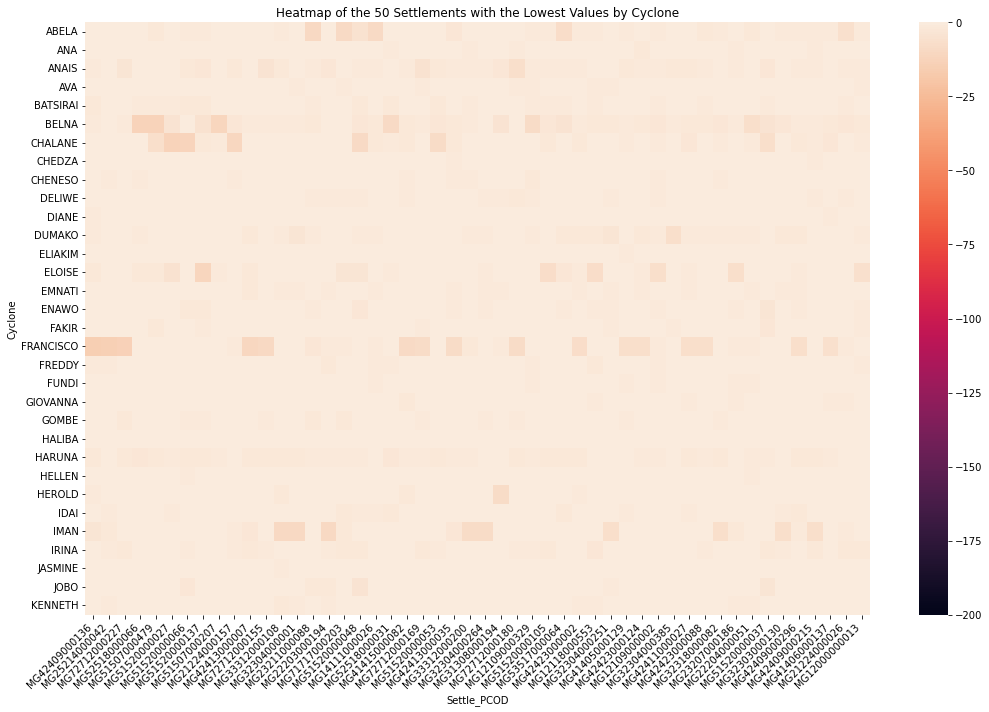

In [16]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 50 settlements with the lowest values
lowest_50_settlements = min_values.nsmallest(50).index

# Step 4: Filter the DataFrame to include only these lowest 50 settlements
filtered_df = pivot_df_filtered[lowest_50_settlements]

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(filtered_df, cmap="rocket", xticklabels=True, yticklabels=True, annot=False, vmin=-200, vmax=0)  # Set annot=True if you want to see the values
plt.title("Heatmap of the 50 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Rotate settlement names for better readability
plt.tight_layout()
plt.show()

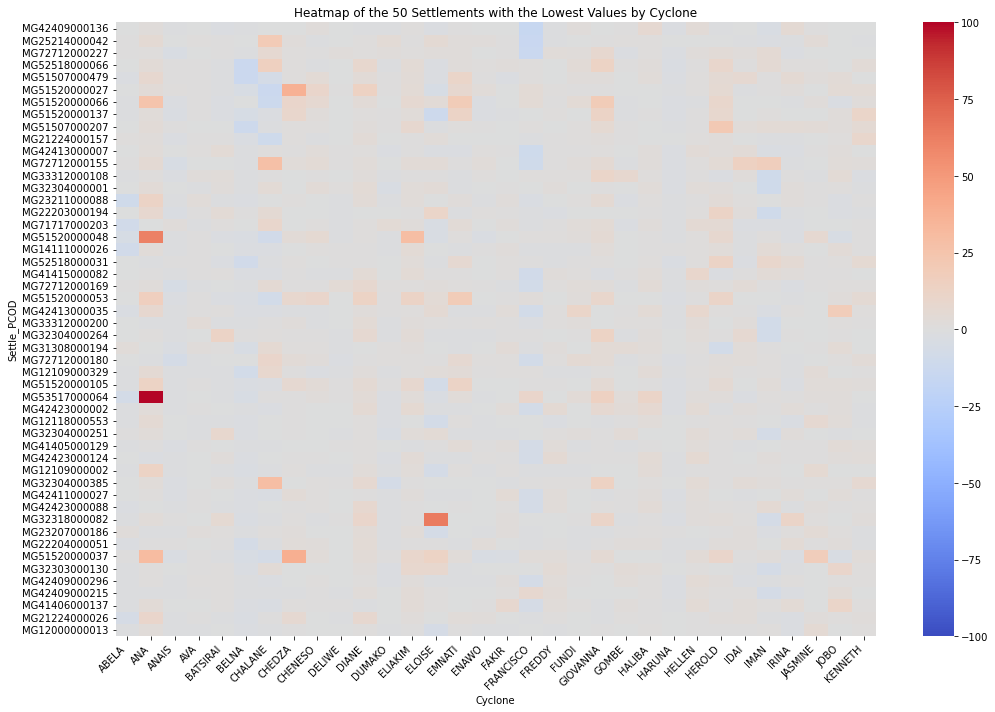

In [27]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 50 settlements with the lowest values
lowest_50_settlements = min_values.nsmallest(50).index

# Step 4: Filter the DataFrame to include only these lowest 50 settlements
filtered_df = pivot_df_filtered[lowest_50_settlements]

# Transpose the DataFrame to pivot the chart
transposed_df = filtered_df.T

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(transposed_df, cmap="coolwarm", xticklabels=True, yticklabels=True, annot=False, vmin=-100, vmax=100)
plt.title("Heatmap of the 50 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Cyclone")
plt.ylabel("Settle_PCOD")
plt.xticks(rotation=45, ha="right")  # Rotate cyclone names for better readability
plt.tight_layout()
plt.show()


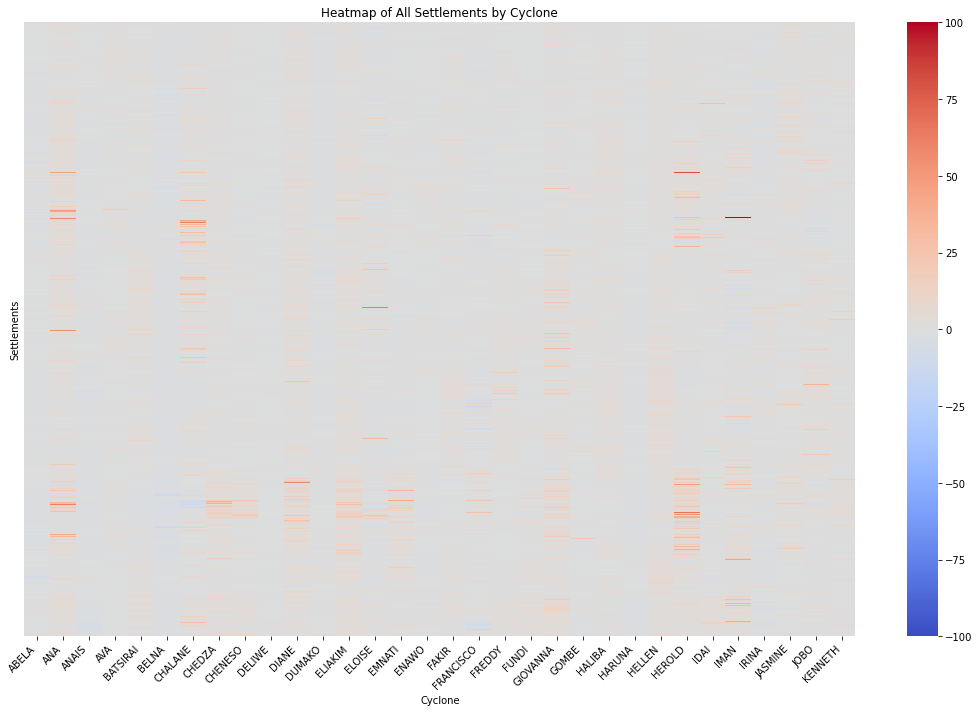

In [18]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Transpose the DataFrame to pivot the chart
transposed_df = pivot_df_filtered.T

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary based on the number of settlements
sns.heatmap(transposed_df, cmap="coolwarm", xticklabels=True, yticklabels=False, annot=False, vmin=-100, vmax=100)
plt.title("Heatmap of All Settlements by Cyclone")
plt.xlabel("Cyclone")
plt.ylabel("Settlements")
plt.xticks(rotation=45, ha="right")  # Rotate cyclone names for better readability
plt.tight_layout()
plt.show()


In [19]:
# Printing the columns of the filtered_df DataFrame
# print(filtered_df.columns)

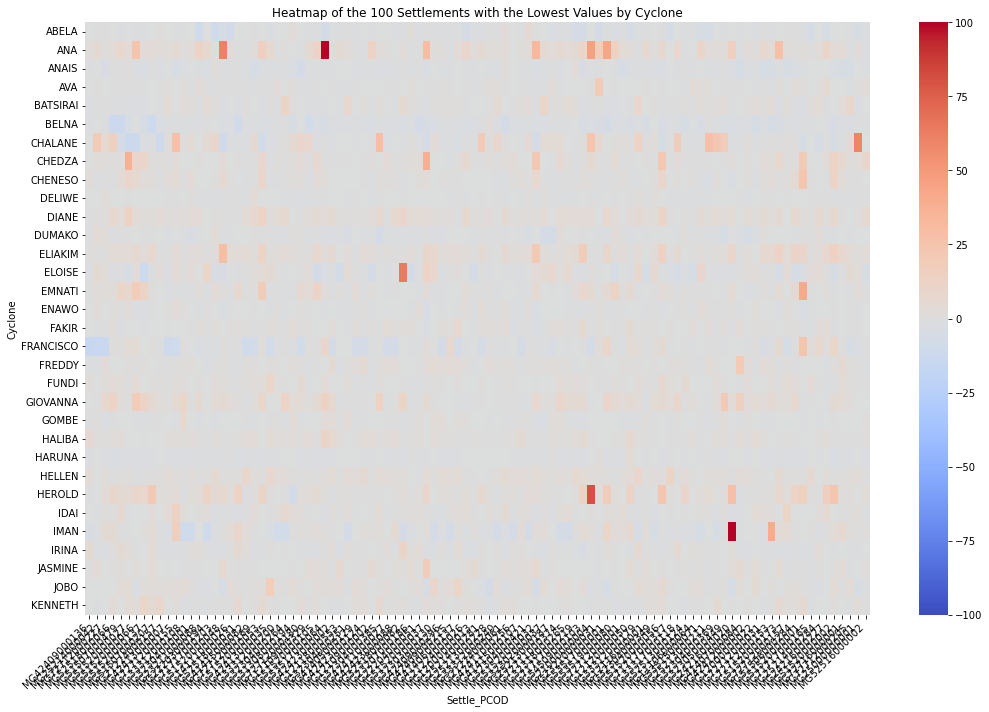

In [20]:
# Step 1: Exclude specified cyclones
pivot_df_filtered = pivot_df.drop(["CHANDA", "DANDO"], errors='ignore')

# Step 2: Calculate the minimum value across cyclones for each Settle_PCOD
min_values = pivot_df_filtered.min(axis=0)

# Step 3: Select the 100 settlements with the lowest values
lowest_100_settlements = min_values.nsmallest(100).index

# Step 4: Filter the DataFrame to include only these lowest 100 settlements
filtered_df = pivot_df_filtered[lowest_100_settlements]

# Plotting the heatmap
plt.figure(figsize=(15, 10))  # Adjust size as necessary
sns.heatmap(filtered_df, cmap="coolwarm", xticklabels=True, yticklabels=True, annot=False, vmin=-100, vmax=100)  # Set annot=True if you want to see the values
plt.title("Heatmap of the 100 Settlements with the Lowest Values by Cyclone")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Rotate settlement names for better readability
plt.tight_layout()
plt.show()

Cyclone         BATSIRAI
Settle_PCOD             
MG23209000001  -2.509651
MG51506000315  -2.467472
MG51520000001  -2.360916
MG71718000051  -2.318258
MG51520000140  -2.243398
...                  ...
MG33313000025  10.380125
MG42414000322  10.772759
MG31307000171  12.122399
MG32304000264  12.395246
MG32302000023  14.451527

[665 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

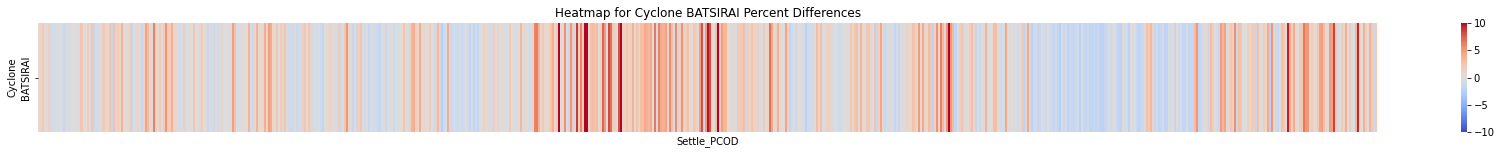

In [30]:
# Filtering the DataFrame to only include BATSIRAI
df_cyclone = pivot_df.loc[["BATSIRAI"]]

# Transpose df_batsirai to make settlements rows for easier sorting
df_cyclone_transposed = df_cyclone.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_cyclone_sorted = df_cyclone_transposed.sort_values(by="BATSIRAI")

# Display the sorted DataFrame
print(df_cyclone_sorted)
# Visualizing the heatmap for BATSIRAI
plt.figure(figsize=(30, 2))  
sns.heatmap(df_cyclone, cmap="coolwarm", xticklabels=False, yticklabels=True, annot=False, vmin=-10, vmax=10)
plt.title("Heatmap for Cyclone BATSIRAI Percent Differences")
plt.xlabel("Settle_PCOD")
plt.ylabel("Cyclone")
plt.show

In [ ]:
# # Filtering the DataFrame to only include BATSIRAI
# df_cyclone = pivot_df.loc[["HEROLD"]]

# # Transpose df_batsirai to make settlements rows for easier sorting
# df_cyclone_transposed = df_cyclone.T

# # Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
# df_cyclone_sorted = df_cyclone_transposed.sort_values(by="HEROLD")
# #### Ranking of settlements based on minimum distance for different cyclones

# def rank_settlements_for_cyclone(min_dist_final_df, cyclone_name, cyclone_col='Cyclone', distance_col='Distance'):
#     """
#     Ranks settlements within a specific cyclone group based on their distance. If no cyclone name is provided,
#     ranks settlements within all cyclone groups by default for BATSIRAI.

#     Parameters:
#     - min_dist_final_df: DataFrame containing the cyclone names, settlements, and distances.
#     - cyclone_name: Specific name of the cyclone to filter the DataFrame by. Defaults to 'BATSIRAI'.
#     - cyclone_col: Name of the column in df that contains the cyclone names. Defaults to 'Cyclone'.
#     - distance_col: Name of the column in df that contains the distances. Defaults to 'Distance'.

#     Returns:
#     - DataFrame with an additional column 'Distance_Rank' indicating the rank of each settlement's distance within the specified (or each) cyclone group.
#     """
#     # Filter the DataFrame for a specific cyclone if cyclone_name is provided
#     if cyclone_name:
#         min_dist_final_df = min_dist_final_df[min_dist_final_df[cyclone_col] == cyclone_name]
    
#     # Proceed with the sorting and ranking
#     sorted_df = min_dist_final_df.sort_values(by=[distance_col])
#     sorted_df['Distance_Rank'] = sorted_df.groupby(cyclone_col)[distance_col].rank(method='min')

#     return sorted_df

# ranked_settlements_cyclone = rank_settlements_for_cyclone(min_dist_final_df, cyclone_name= 'HEROLD')
# ranked_settlements_cyclone

In [31]:
### Ranking of settlements based on minimum distance for different cyclones <200km

# Filtering the DataFrame to only include BATSIRAI
df_cyclone = pivot_df.loc[["BATSIRAI"]]

# Transpose df_batsirai to make settlements rows for easier sorting
df_cyclone_transposed = df_cyclone.T

# Sort the transposed DataFrame by its values (BATSIRAI's PD values) in ascending order
df_cyclone_sorted = df_cyclone_transposed.sort_values(by="BATSIRAI")


def rank_settlements_for_cyclone(min_dist_final_df, cyclone_name, cyclone_col='Cyclone', distance_col='Distance'):
    """
    Ranks settlements within a specific cyclone group based on their distance, only including settlements with distances < 200,000.
    If no cyclone name is provided, ranks settlements within all cyclone groups by default for BATSIRAI.

    Parameters:
    - min_dist_final_df: DataFrame containing the cyclone names, settlements, and distances.
    - cyclone_name: Specific name of the cyclone to filter the DataFrame by. Defaults to 'BATSIRAI'.
    - cyclone_col: Name of the column in df that contains the cyclone names. Defaults to 'Cyclone'.
    - distance_col: Name of the column in df that contains the distances. Defaults to 'Distance'.

    Returns:
    - DataFrame with an additional column 'Distance_Rank' indicating the rank of each settlement's distance within the specified (or each) cyclone group, for distances < 200,000.
    """
    # Filter the DataFrame for a specific cyclone if cyclone_name is provided
    if cyclone_name:
        filtered_df = min_dist_final_df[min_dist_final_df[cyclone_col] == cyclone_name]

    # Further filter to include only settlements with distances < 200,000
    filtered_df = filtered_df[filtered_df[distance_col] < 200000]
    
    # Proceed with the sorting and ranking
    sorted_df = filtered_df.sort_values(by=[distance_col])
    sorted_df['Distance_Rank'] = sorted_df[distance_col].rank(method='min')

    return sorted_df

# Use the adjusted function to rank settlements for 'BATSIRAI', including only those with distances < 200,000
ranked_settlements_cyclone = rank_settlements_for_cyclone(min_dist_final_df, 'BATSIRAI', 'Cyclone', 'Distance')

# Now, ranked_settlements_cyclone includes only the settlements meeting the distance criterion, ranked accordingly.
ranked_settlements_cyclone

,Cyclone,Settle_PCOD,Distance,Distance_Rank
44429,BATSIRAI,MG51520000173,3895.281576,1.0
21389,BATSIRAI,MG21225000067,9434.730618,2.0
47373,BATSIRAI,MG51505000032,9720.956722,3.0
24845,BATSIRAI,MG23206000022,9958.304313,4.0
21773,BATSIRAI,MG21220000166,10530.105223,5.0
...,...,...,...,...
51981,BATSIRAI,MG54508000078,197763.677218,189.0
15117,BATSIRAI,MG12116000203,198110.575782,190.0
56077,BATSIRAI,MG31306000073,198922.992638,191.0
7821,BATSIRAI,MG11115000235,199314.182492,192.0


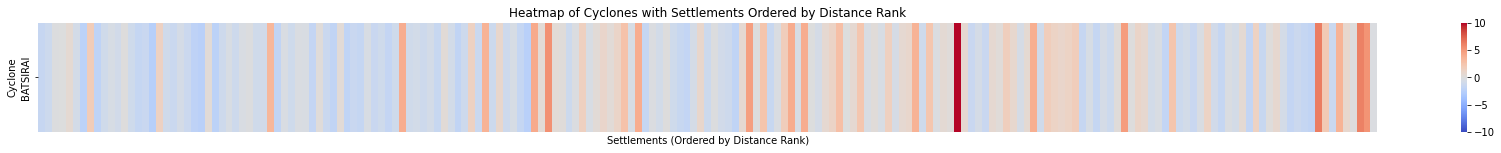

In [32]:
ranked_settlements_cyclone
ordered_settlements = ranked_settlements_cyclone.sort_values('Distance_Rank', ascending=True)['Settle_PCOD'].tolist()
# Reorder the columns of pivot_df based on ordered_settlements
pivot_df_reordered = df_cyclone[ordered_settlements]

# Plot the heatmap
plt.figure(figsize=(30, 2))  # Adjust figure size as needed
sns.heatmap(pivot_df_reordered, cmap="coolwarm", xticklabels=False, yticklabels=True, annot=False, vmin=-10, vmax=10)
plt.title(f"Heatmap of Cyclones with Settlements Ordered by Distance Rank")
plt.xlabel("Settlements (Ordered by Distance Rank)")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Improve readability of settlement labels
plt.show()

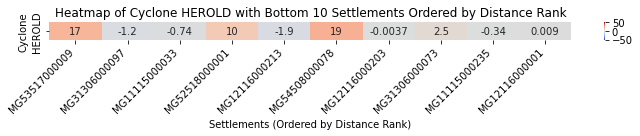

In [33]:
# Select the last 10 settlements based on Distance Rank
bottom_10_ordered_settlements = ranked_settlements_cyclone.sort_values('Distance_Rank', ascending=True)['Settle_PCOD'].tail(10).tolist()

# Filter the DataFrame to include only columns for the bottom 10 settlements
pivot_df_bottom_10 = pivot_df[bottom_10_ordered_settlements]

# Now, filter to keep only the BATSIRAI row from the correctly selected bottom 10 settlements DataFrame
batsirai_heatmap_data_bottom_10 = pivot_df_bottom_10.loc[['HEROLD']]

# Plot the heatmap for the bottom 10 settlements
plt.figure(figsize=(10, 2))  # Adjust figure size as needed for bottom 10 settlements
sns.heatmap(batsirai_heatmap_data_bottom_10, cmap="coolwarm", xticklabels=True, yticklabels=True, annot=True, vmin=-50, vmax=50)
plt.title("Heatmap of Cyclone HEROLD with Bottom 10 Settlements Ordered by Distance Rank")
plt.xlabel("Settlements (Ordered by Distance Rank)")
plt.ylabel("Cyclone")
plt.xticks(rotation=45, ha="right")  # Improve readability of settlement labels
plt.tight_layout()  # Adjust layout to make room for the tick labels
plt.show()


In [25]:
# For comma-separated values
rmax_df = pd.read_csv(belmontdir + 'bsh082022_batsirai.dat', sep=',')
print(rmax_df)


               datetime   lon   lat  vmax_mps  mslp_hPa  rmax_km  r34_km
0   2022-01-23 18:00:00  88.3  -8.3      10.3    1006.0     68.4     NaN
1   2022-01-24 00:00:00  89.0  -8.8      10.3    1005.0     67.9     NaN
2   2022-01-24 06:00:00  89.6  -9.3      10.3    1005.0     67.9     NaN
3   2022-01-24 12:00:00  89.8  -9.8      10.3    1004.0     67.4     NaN
4   2022-01-24 18:00:00  90.1 -10.3      12.9    1002.0     66.5     NaN
..                  ...   ...   ...       ...       ...      ...     ...
60  2022-02-07 18:00:00  41.6 -25.6      25.7     984.0     53.6   351.9
61  2022-02-08 00:00:00  41.7 -26.2      25.7     988.0     49.6   213.0
62  2022-02-08 06:00:00  41.7 -26.8      20.6     989.0     70.8   331.0
63  2022-02-08 12:00:00  41.8 -28.3      18.0     992.0     94.3   289.4
64  2022-02-08 18:00:00  42.3 -30.4      18.0     996.0     84.8   324.1

[65 rows x 7 columns]
